## Bootstrap tests


- The distribution of sample mean value should approach a normal distribution as the sample size (how many times of bootstrap) increases. This is known as the Central Limit Theorem.
- The sample size should not affect the distribution width of the sample mean value.
- The data size (how many configurations you have) should affect the distribution width of the sample mean value.

In [1]:
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt

from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import bootstrap, bs_ls_avg

In [5]:
datafile = "data/samples.txt" # these are data on 800 configurations
temp = np.loadtxt(datafile, skiprows=1) # the 0 column is the conf index, the 1 column is the data
data = temp[:,1] # remove the index column

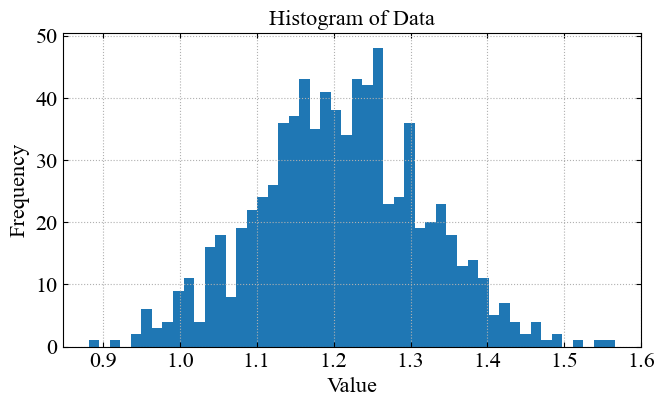

In [3]:
fig, ax = default_plot()
plt.hist(data, bins=50)
plt.xlabel('Value', **fs_p)
plt.ylabel('Frequency', **fs_p)
plt.title('Histogram of Data', **fs_p)
plt.tight_layout()
plt.show()

### Comparison of the distribution of the sample mean value for different sample sizes

In [8]:
# do a bootstrap resampling with different number of samples
bs_50, _ = bootstrap(data, samp_times=50)
bs_100, _ = bootstrap(data, samp_times=100)
bs_200, _ = bootstrap(data, samp_times=200)
bs_500, _ = bootstrap(data, samp_times=500)

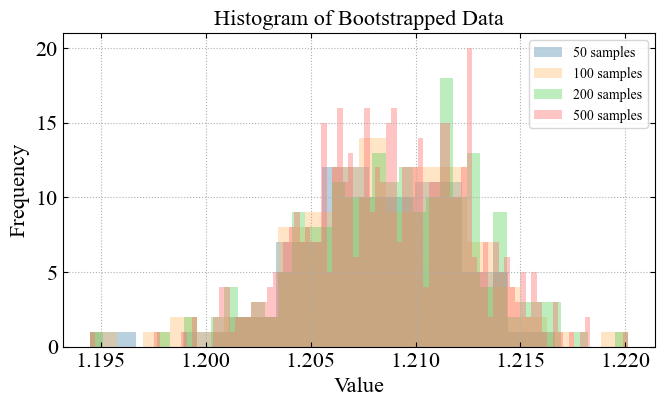

In [9]:
# plot the histograms of the resampled data, we found that the distribution widths are similar

fig, ax = default_plot()
plt.hist(bs_50, bins=10, alpha=0.4, color=color_ls[0], label='50 samples')
plt.hist(bs_100, bins=20, alpha=0.4, color=color_ls[1], label='100 samples')
plt.hist(bs_200, bins=40, alpha=0.4, color=color_ls[2], label='200 samples')
plt.hist(bs_500, bins=100, alpha=0.4, color=color_ls[3], label='500 samples')
plt.xlabel('Value', **fs_p)
plt.ylabel('Frequency', **fs_p)
plt.title('Histogram of Bootstrapped Data', **fs_p)
plt.tight_layout()
plt.legend()

### Comparison of the distribution of the sample mean value for different data sizes

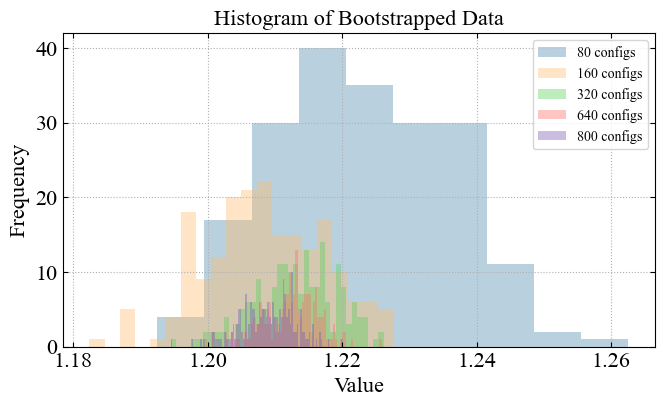

In [10]:
# plot the histogram of different number of configurations, we found that the distribution widths are smaller when adding more configurations

bs_data_80, _ = bootstrap(data[:80], samp_times=200)
bs_data_160, _ = bootstrap(data[:160], samp_times=200)
bs_data_320, _ = bootstrap(data[:320], samp_times=200)
bs_data_640, _ = bootstrap(data[:640], samp_times=200)
bs_data_800, _ = bootstrap(data, samp_times=200)

fig, ax = default_plot()
plt.hist(bs_data_80, bins=10, alpha=0.4, color=color_ls[0], label='80 configs')
plt.hist(bs_data_160, bins=20, alpha=0.4, color=color_ls[1], label='160 configs')
plt.hist(bs_data_320, bins=40, alpha=0.4, color=color_ls[2], label='320 configs')
plt.hist(bs_data_640, bins=80, alpha=0.4, color=color_ls[3], label='640 configs')
plt.hist(bs_data_800, bins=100, alpha=0.4, color=color_ls[4], label='800 configs')
plt.xlabel('Value', **fs_p)
plt.ylabel('Frequency', **fs_p)
plt.title('Histogram of Bootstrapped Data', **fs_p)
plt.tight_layout()
plt.legend()
plt.show()